## Predict whether a mammogram mass is benign or malignat

We will be using the 'mammographic masses' public dataeset from the UCL respository(source:http://archive.ics.uci.edu/ml/datasets/mammographic+mass)
Aim is to predict if a mass detected during a mammogram is benign or malignant.

The data contains 961 instances of mass detected in mammograms,and contains the following attributes:

- BI-RADS assessment 1 to 5(ordinal)
- Age(interger)
- shape(round=1,oval=1,lobular=3,irregular=4(norminal))
- margin(circumcribed=1,microlobulated=2,obstructed =3,ill-defined=4,spiculated=5(norminal))
- Density(high=1,iso=2,low=3,fat-containing=4(ordinal)
- Severity(begnin=0,malignant=1(binominal)

This problem is a binary classification problem and severity is the class attribute

## Data Preprocessing

In [1]:
#loading data

import pandas as pd
mammogram_masses=pd.read_csv('mammographic_masses.data')

In [2]:
#visualizing data
mammogram_masses.head()


,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [3]:
# getting the shape of the data
mammogram_masses.shape

(960, 6)

In [4]:
# getting some information of the data set
mammogram_masses.info

<bound method DataFrame.info of      5  67  3 5.1 3.1  1
0    4  43  1   1   ?  1
1    5  58  4   5   3  1
2    4  28  1   1   3  0
3    5  74  1   5   ?  1
4    4  65  1   ?   3  0
..  ..  .. ..  ..  .. ..
955  4  47  2   1   3  0
956  4  56  4   5   3  1
957  4  64  4   5   3  0
958  5  66  4   5   3  1
959  4  62  3   3   3  0

[960 rows x 6 columns]>

In [5]:
#basic statistics
mammogram_masses.describe()

,1
count,960.000000
mean,0.462500
std,0.498852
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
#Adding Column label
# get the labels from the text filed provided
# replace ? with nan

mammogram_masses=pd.read_csv('mammographic_masses.data',na_values=['?'],names=['BI-RADS','age','shape','margin','density','severity'])

In [7]:
# checking our transformation
#loading data

mammogram_masses.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [8]:
#checking for missing value

mammogram_masses.isnull()

,BI-RADS,age,shape,margin,density,severity
0,False,False,False,False,False,False
1,False,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
956,False,False,False,False,False,False
957,False,False,False,False,False,False
958,False,False,False,False,False,False
959,False,False,False,False,False,False


In [9]:
# filling missing data with it mean value
mammogram_masses=mammogram_masses.fillna(mammogram_masses.mean())

In [10]:
# checking if there are any more missing values
mammogram_masses.isnull()

,BI-RADS,age,shape,margin,density,severity
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
956,False,False,False,False,False,False
957,False,False,False,False,False,False
958,False,False,False,False,False,False
959,False,False,False,False,False,False


## Data Visualization
- visualized possible distribution and relationship of our data

In [11]:
# Importing libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

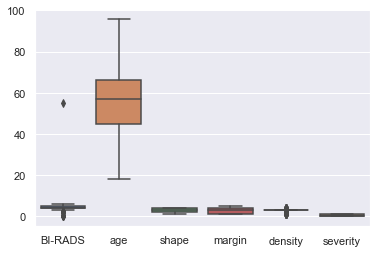

In [12]:
# using a boxplot to get the 5 quartile distribuition of the data
sns.boxplot(data=mammogram_masses)

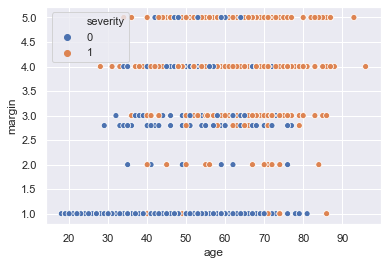

In [13]:
#using scatter plot to checking relationship between age ,margin and severity
ax=sns.scatterplot(x="age", y="margin",hue="severity", 
                   data=mammogram_masses)

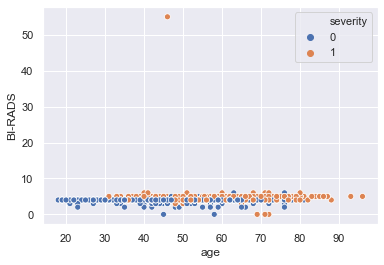

In [14]:
#using scatter plot to checking relationship between age ,BI-RADS and severity
ax=sns.scatterplot(x="age", y="BI-RADS",hue="severity", 
                   data=mammogram_masses)

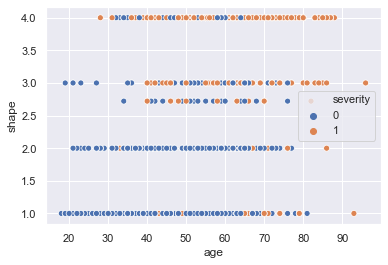

In [15]:
#using scatter plot to checking relationship between age ,shape and severity
ax=sns.scatterplot(x="age", y="shape",hue="severity", 
                   data=mammogram_masses)

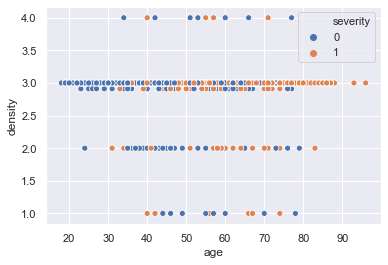

In [16]:
#using scatter plot to checking relationship between age ,density and severity
ax=sns.scatterplot(x="age", y="density",hue="severity", 
                   data=mammogram_masses)

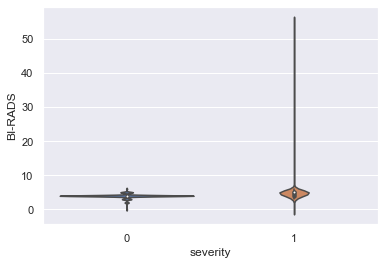

In [17]:
#using violin plots to do a univariate analysis
sns.violinplot(x="severity", y="BI-RADS",data=mammogram_masses)

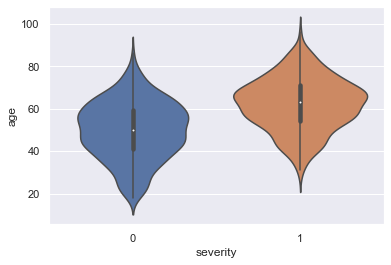

In [18]:
sns.violinplot(x="severity", y="age",data=mammogram_masses)

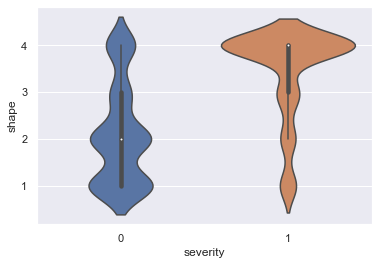

In [19]:
sns.violinplot(x="severity", y="shape",data=mammogram_masses)

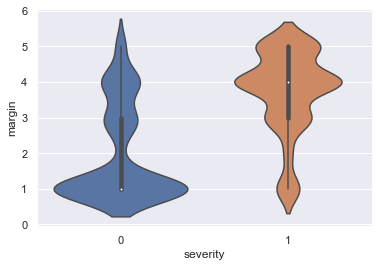

In [20]:
sns.violinplot(x="severity", y="margin",data=mammogram_masses)

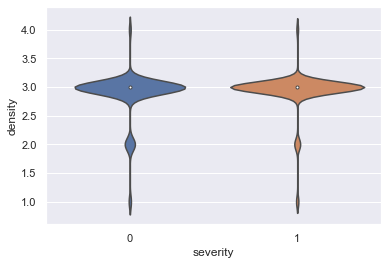

In [21]:
sns.violinplot(x="severity", y="density",data=mammogram_masses)

- From the scatter plot BI-RADS has little or no effect on the severity
- Using the violin plot we can elimiate BI-RADS and density as it has similarity between each category 
- We will start by eliminating BI_RADS 

In [11]:
# Seperating into class and features
# We are dropping BI RADS as it plays no path in the prediction
# Its is the level of correctness of the labelling
mammogram_features=mammogram_masses[['age','shape','margin','density']].values
mammogram_class=mammogram_masses['severity'].values


In [23]:
# visualizing the features data
print(mammogram_features)

[[67.          3.          5.          3.        ]
 [43.          1.          1.          2.91073446]
 [58.          4.          5.          3.        ]
 ...
 [64.          4.          5.          3.        ]
 [66.          4.          5.          3.        ]
 [62.          3.          3.          3.        ]]


In [12]:
# Normalizing our feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mammogram_features_scaled=scaler.fit_transform(mammogram_features)


In [13]:
# visualizing the normalized data
print(mammogram_features_scaled)


[[ 0.79755224  0.22791465  1.44403739  0.24464071]
 [-0.86508983 -1.40884695 -1.17704837  0.        ]
 [ 0.17406146  1.04629545  1.44403739  0.24464071]
 ...
 [ 0.58972198  1.04629545  1.44403739  0.24464071]
 [ 0.72827549  1.04629545  1.44403739  0.24464071]
 [ 0.45116848  0.22791465  0.13349451  0.24464071]]


In [14]:
# Splitting data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mammogram_features_scaled, mammogram_class, test_size=0.33, random_state=42)

## Machine Learning algorithm exploration

- we will do hyperparameters turning uisng GridSearchCV
- We will explore a series of algorithms to get the best performer
- support vector Classification(SVC)
- Logistic Regression
- KNeighborsClassifier
- Neural Networks

## SVC

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
tuned_parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,0.3,0.5,0.7,1,4,7,10]}
estimator = SVC(gamma='scale')
clf = GridSearchCV(estimator, tuned_parameters)
# fit model for training
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Confusion Matrix")
y_true, y_pred = y_test, clf.predict(X_test)
print()
print(confusion_matrix(y_true, y_pred))
print("Detailed classification report:")
print()
print(classification_report(y_true, y_pred))
print()
print("accuracy")
print(accuracy_score(y_true,y_pred)*100)

Best parameters set found on development set:

{'C': 0.5, 'kernel': 'linear'}

Confusion Matrix

[[129  40]
 [ 20 129]]
Detailed classification report:

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       169
           1       0.76      0.87      0.81       149

    accuracy                           0.81       318
   macro avg       0.81      0.81      0.81       318
weighted avg       0.82      0.81      0.81       318


accuracy
81.13207547169812


## Logistic Regression

In [28]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
tuned_parameters = {'penalty':['l1','l2'], 'C':[0.00001,0.1,0.3,0.5,0.7,1,4]}
estimator = LogisticRegression()
clf = GridSearchCV(estimator, tuned_parameters)
# fit model for training
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
y_true, y_pred = y_test, clf.predict(X_test)
print("Confusion Matrix")
print()
print(confusion_matrix(y_true, y_pred))
print("Detailed classification report:")
print()
print(classification_report(y_true, y_pred))
print()
print("accuracy")
print(accuracy_score(y_true,y_pred)*100)

C:\Users\Gerald\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gerald\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gerald\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gerald\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gerald\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

Best parameters set found on development set:

{'C': 0.1, 'penalty': 'l2'}

Confusion Matrix

[[129  40]
 [ 20 129]]
Detailed classification report:

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       169
           1       0.78      0.85      0.82       149

    accuracy                           0.82       318
   macro avg       0.82      0.82      0.82       318
weighted avg       0.82      0.82      0.82       318


accuracy
82.0754716981132


## KNeighborsClassifier

In [29]:
# KNeigborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
tuned_parameters = {'n_neighbors':(1,3,5,8,11,15), 'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
estimator = KNeighborsClassifier()
clf = GridSearchCV(estimator, tuned_parameters)
# fit model for training
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Confusion Matrix")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(confusion_matrix(y_true, y_pred))
print("Detailed classification report:")
print()
print(classification_report(y_true, y_pred))
print()
print("accuracy")
print(accuracy_score(y_true,y_pred)*100)

C:\Users\Gerald\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

Confusion Matrix

[[134  35]
 [ 22 127]]
Detailed classification report:

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       169
           1       0.77      0.81      0.79       149

    accuracy                           0.80       318
   macro avg       0.80      0.80      0.80       318
weighted avg       0.80      0.80      0.80       318


accuracy
79.55974842767296


## RandomForestClassifier

In [30]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
tuned_parameters = {'n_estimators':[100,500,1000], 'max_depth':[5,10,20,100],'min_samples_leaf':[1,3,5,10]}
estimator = RandomForestClassifier()
clf = GridSearchCV(estimator, tuned_parameters)
# fit model for training
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
y_true, y_pred = y_test, clf.predict(X_test)
print("Confusion Matrix")
print()
print(confusion_matrix(y_true, y_pred))
print("Detailed classification report:")
print()
print(classification_report(y_true, y_pred))
print()
print("accuracy")
print(accuracy_score(y_true,y_pred)*100)

C:\Users\Gerald\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 100}

Confusion Matrix

[[133  36]
 [ 29 120]]
Detailed classification report:

              precision    recall  f1-score   support

           0       0.87      0.78      0.83       169
           1       0.78      0.87      0.82       149

    accuracy                           0.82       318
   macro avg       0.83      0.83      0.82       318
weighted avg       0.83      0.82      0.82       318


accuracy
82.38993710691824


## XGBClassifier

In [31]:
#XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
tuned_parameters = {'learning_rate':[0.001,0.01,0.05], 'max_depth':[5,10,20,100],'n_estimators':[10,100,500,100]}
estimator = XGBClassifier()
clf = GridSearchCV(estimator, tuned_parameters)
# fit model for training
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Confusion Matrix")
print()
print(confusion_matrix(y_true, y_pred))
print("Detailed classification report:")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()
print("accuracy")
print(accuracy_score(y_true,y_pred)*100)

C:\Users\Gerald\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

Confusion Matrix

[[132  37]
 [ 19 130]]
Detailed classification report:

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       169
           1       0.77      0.85      0.81       149

    accuracy                           0.81       318
   macro avg       0.81      0.81      0.81       318
weighted avg       0.81      0.81      0.81       318


accuracy
80.81761006289308


## Neural Networks

In [18]:
# Neural Networks
# code inspired by https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/
# Importing Libraries
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
# Building model
# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
   # create model
    model = Sequential()
    model.add(Dense(12, input_dim=4, kernel_initializer=init, activation='relu'))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [25,50]
batches = [20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
clf = GridSearchCV(estimator=model, param_grid=param_grid)
clf_result = clf.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (clf_result.best_score_, clf_result.best_params_))
means =clf_result.cv_results_['mean_test_score']
stds = clf_result.cv_results_['std_test_score']
params = clf_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
                  print("%f (%f) with: %r" % (mean, stdev, param))  
        
y_true, y_pred = y_test, clf.predict(X_test)        
print("Confusion Matrix")
print()
print(confusion_matrix(y_true, y_pred))
print("Detailed classification report:")
print()
print(classification_report(y_true, y_pred))
print()
print("accuracy")
print(accuracy_score(y_true,y_pred)*100)



C:\Users\Gerald\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.783826 using {'batch_size': 20, 'epochs': 25, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.783826 (0.022632) with: {'batch_size': 20, 'epochs': 25, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.768274 (0.016344) with: {'batch_size': 20, 'epochs': 25, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.780715 (0.016900) with: {'batch_size': 20, 'epochs': 25, 'init': 'normal', 'optimizer': 'rmsprop'}
0.779160 (0.019677) with: {'batch_size': 20, 'epochs': 25, 'init': 'normal', 'optimizer': 'adam'}
0.782271 (0.018329) with: {'batch_size': 20, 'epochs': 25, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.780715 (0.021306) with: {'batch_size': 20, 'epochs': 25, 'init': 'uniform', 'optimizer': 'adam'}
0.774495 (0.023402) with: {'batch_size': 20, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.780715 (0.020333) with: {'batch_size': 20, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.782271 (0.017846) with: {'batch_size': 20, 'epochs': 50, 'init':

## Reducing the data further

In [19]:
# Seperating into class and features
# We are dropping BI RADS and density as it plays no path in the prediction
# Its is the level of correctness of the labelling
mammogram_redfeatures=mammogram_masses[['shape','margin','age']].values
mammogram_class=mammogram_masses['severity'].values

In [20]:
# visualizing the features data
print(mammogram_redfeatures)

[[ 3.  5. 67.]
 [ 1.  1. 43.]
 [ 4.  5. 58.]
 ...
 [ 4.  5. 64.]
 [ 4.  5. 66.]
 [ 3.  3. 62.]]


In [21]:
# Normalizing our feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mammogram_redfeatures_scaled=scaler.fit_transform(mammogram_redfeatures)


In [22]:
# visualizing the normalized data
print(mammogram_redfeatures_scaled)

[[ 0.22791465  1.44403739  0.79755224]
 [-1.40884695 -1.17704837 -0.86508983]
 [ 1.04629545  1.44403739  0.17406146]
 ...
 [ 1.04629545  1.44403739  0.58972198]
 [ 1.04629545  1.44403739  0.72827549]
 [ 0.22791465  0.13349451  0.45116848]]


In [23]:
# Splitting data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mammogram_redfeatures_scaled, mammogram_class, test_size=0.33, random_state=42)

## Machine Learning

In [25]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
tuned_parameters = {'n_estimators':[100,500,1000], 'max_depth':[5,10,20,100],'min_samples_leaf':[1,3,5,10]}
estimator = RandomForestClassifier()
clf = GridSearchCV(estimator, tuned_parameters)
# fit model for training
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Confusion Matrix")
y_true, y_pred = y_test, clf.predict(X_test)
print()
print(confusion_matrix(y_true, y_pred))
print("Detailed classification report:")
print()
print(classification_report(y_true, y_pred))
print()
print("accuracy")
print(accuracy_score(y_true,y_pred)*100)

C:\Users\Gerald\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 100}

Confusion Matrix

[[136  33]
 [ 22 127]]
Detailed classification report:

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       169
           1       0.79      0.85      0.82       149

    accuracy                           0.83       318
   macro avg       0.83      0.83      0.83       318
weighted avg       0.83      0.83      0.83       318


accuracy
82.70440251572327


In [24]:
# KNeigborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
tuned_parameters = {'n_neighbors':(1,3,5,8,11,15), 'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
estimator = KNeighborsClassifier()
clf = GridSearchCV(estimator, tuned_parameters)
# fit model for training
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
y_true, y_pred = y_test, clf.predict(X_test)
print("Confusion Matrix")
print()
print(confusion_matrix(y_true, y_pred))
print("Detailed classification report:")
print()
print(classification_report(y_true, y_pred))
print()
print("accuracy")
print(accuracy_score(y_true,y_pred)*100)

C:\Users\Gerald\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

Confusion Matrix

[[140  29]
 [ 26 123]]
Detailed classification report:

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       169
           1       0.81      0.83      0.82       149

    accuracy                           0.83       318
   macro avg       0.83      0.83      0.83       318
weighted avg       0.83      0.83      0.83       318


accuracy
82.70440251572327


In [27]:
# Neural Networks
# code inspired by https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/
# Importing Libraries
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
# Building model
# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
   # create model
    model = Sequential()
    model.add(Dense(12, input_dim=3, kernel_initializer=init, activation='relu'))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [25,50]
batches = [20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
clf = GridSearchCV(estimator=model, param_grid=param_grid)
clf_result = clf.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (clf_result.best_score_, clf_result.best_params_))
means =clf_result.cv_results_['mean_test_score']
stds = clf_result.cv_results_['std_test_score']
params = clf_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
                  print("%f (%f) with: %r" % (mean, stdev, param))  
        
y_true, y_pred = y_test, clf.predict(X_test)        
print("Confusion Matrix")
print()
print(confusion_matrix(y_true, y_pred))
print("Detailed classification report:")
print()
print(classification_report(y_true, y_pred))
print()
print("accuracy")
print(accuracy_score(y_true,y_pred)*100)



Best: 0.793157 using {'batch_size': 20, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.788491 (0.016186) with: {'batch_size': 20, 'epochs': 25, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.790047 (0.025342) with: {'batch_size': 20, 'epochs': 25, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.783826 (0.013768) with: {'batch_size': 20, 'epochs': 25, 'init': 'normal', 'optimizer': 'rmsprop'}
0.788491 (0.018996) with: {'batch_size': 20, 'epochs': 25, 'init': 'normal', 'optimizer': 'adam'}
0.777605 (0.018169) with: {'batch_size': 20, 'epochs': 25, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.790047 (0.016802) with: {'batch_size': 20, 'epochs': 25, 'init': 'uniform', 'optimizer': 'adam'}
0.793157 (0.031454) with: {'batch_size': 20, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.791602 (0.015755) with: {'batch_size': 20, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.788491 (0.015639) with: {'batch_size': 20, 'epochs': 50, 'init':

## Conclusion

RandomForestClassifier  is our best algorithm in both circumstances,but performs better when whe remove the age variable.